In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras import backend as K

from matplotlib import pyplot as plt
import pickle
import numpy as np

In [2]:
batch_size = 1024
num_classes = 2
epochs = 20

In [3]:
x, y = make_moons(n_samples=1000, noise=0.06)
scaler = StandardScaler()
x = scaler.fit_transform(x)

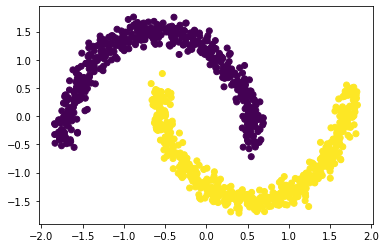

In [4]:
plt.scatter(x.T[0], x.T[1], c=y);

In [3]:
def activation(x):
    return np.power(x, 2)

In [6]:
model = Sequential([
    Dense(2, activation=activation, input_shape=(2,)),
    Dense(2, activation=activation),
    Dense(1, activation='sigmoid')
])

W1022 02:06:18.883511 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1022 02:06:19.089942 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 02:06:19.130913 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W1022 02:06:35.145624 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1022 02:06:35.570907 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1022 02:06:35.590386 139620780250752 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.fit(x, y, epochs=50)

Epoch 1/50
1000/1000 [==============================] - 0s 125us/step - loss: 0.2798 - acc: 0.8240
Epoch 2/50
1000/1000 [==============================] - 0s 126us/step - loss: 0.2779 - acc: 0.8240
Epoch 3/50
1000/1000 [==============================] - 0s 134us/step - loss: 0.2762 - acc: 0.8230
Epoch 4/50
1000/1000 [==============================] - 0s 137us/step - loss: 0.2745 - acc: 0.8230
Epoch 5/50
1000/1000 [==============================] - 0s 140us/step - loss: 0.2730 - acc: 0.8250
Epoch 6/50
1000/1000 [==============================] - 0s 151us/step - loss: 0.2716 - acc: 0.8250
Epoch 7/50
1000/1000 [==============================] - 0s 128us/step - loss: 0.2702 - acc: 0.8260
Epoch 8/50
1000/1000 [==============================] - 0s 124us/step - loss: 0.2690 - acc: 0.8290
Epoch 9/50
1000/1000 [==============================] - 0s 144us/step - loss: 0.2677 - acc: 0.8340
Epoch 10/50
1000/1000 [==============================] - 0s 158us/step - loss: 0.2666 - acc: 0.8360
Epoch 11/

In [12]:
with open('data-03.pkl', 'wb') as f:
    pickle.dump({ 'x': x, 'y': y }, f)

## Using older data

In [4]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
x = data['x']
y = data['y']

In [17]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x, y, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 1s 874us/step - loss: 0.2058 - acc: 0.9020
Epoch 2/100
1000/1000 [==============================] - 0s 128us/step - loss: 0.2007 - acc: 0.9050
Epoch 3/100
1000/1000 [==============================] - 0s 130us/step - loss: 0.1981 - acc: 0.9080
Epoch 4/100
1000/1000 [==============================] - 0s 120us/step - loss: 0.2031 - acc: 0.9050
Epoch 5/100
1000/1000 [==============================] - 0s 135us/step - loss: 0.1973 - acc: 0.9110
Epoch 6/100
1000/1000 [==============================] - 0s 136us/step - loss: 0.1950 - acc: 0.9070
Epoch 7/100
1000/1000 [==============================] - 0s 151us/step - loss: 0.1959 - acc: 0.9130
Epoch 8/100
1000/1000 [==============================] - 0s 144us/step - loss: 0.1947 - acc: 0.9160
Epoch 9/100
1000/1000 [==============================] - 0s 143us/step - loss: 0.2084 - acc: 0.9090
Epoch 10/100
1000/1000 [==============================] - 0s 144us/step - loss: 0.1929 - acc: 0.9110

## Using the older framework to get variance

In [6]:
def get_model(bn_dropout=False):
    return  Sequential([
        Dense(2, activation=activation, input_shape=(2,)),
        Dense(2, activation=activation),
        Dense(1, activation='sigmoid')
    ])

In [7]:
def run_one_experiment(bn_dropout=False, lipschitz_lr=False, reduce_data=False, oversample=False):
    # Step 1: Get the model
    model = get_model(bn_dropout=bn_dropout)
    
    # Step 2: Get the data
    if reduce_data:
        x_train, x_test, y_train, y_test = train_test_split(xb, yb)
        
        if oversample:
            x_train = np.concatenate([x_train, x_train, x_train], axis=0)
            y_train = np.concatenate([y_train, y_train, y_train], axis=0)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y)
        
    ####################
    # LipschitzLR code #
    ####################
    
    def lr_schedule(epoch):
        """Learning Rate Schedule
        # Arguments
            epoch (int): The number of epochs
        # Returns
            lr (float32): learning rate
        """

        Kz = 0.
        for i in range((len(x_train) - 1) // batch_size + 1):
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = x_train[start_i:end_i]

            activ = np.linalg.norm(func([xb]))
            if activ > Kz:
                Kz = activ

        K_ = ((num_classes - 1) * Kz) / (num_classes * batch_size)
        lr = 1 / K_
        print('Epoch', epoch + 1, 'LR =', lr)
        return lr
    
    ####################
    
    
    # Step 3: Train the model
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    if lipschitz_lr:
        func = K.function([model.layers[0].input], [model.layers[-2].output])
        lr_scheduler = LearningRateScheduler(lr_schedule)
        model.fit(x_train, y_train, batch_size=batch_size, verbose=0, validation_data=(x_test, y_test), epochs=100, callbacks=[lr_scheduler])
    else:
        model.fit(x_train, y_train, batch_size=batch_size, verbose=0, validation_data=(x_test, y_test), epochs=100)
    
    print('\nTrain accuracy:', model.history.history['acc'][-1], 
          '\nValidation accuracy:', model.history.history['val_acc'][-1])
    print('-' * 100)
    
    acc.append(model.history.history['acc'][-1])
    val_acc.append(model.history.history['val_acc'][-1])

In [8]:
acc = []
val_acc = []

In [9]:
def run_20_experiments(**kwargs):
    global acc, val_acc
    
    acc = []
    val_acc = []
    
    count = 0
    while count != 20:
        try:
            print('Trying run', count + 1)
            run_one_experiment(**kwargs)
            count += 1
        except:
            count += 1
            raise
    
    print(acc, '\n', val_acc)

In [12]:
run_20_experiments()

W1022 02:26:52.675538 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Trying run 1


W1022 02:26:52.747373 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1022 02:26:52.766301 139620780250752 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1022 02:26:53.440827 139620780250752 deprecation_wrapper.py:119] From /usr/local/lib64/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.




Train accuracy: 0.6186666488647461 
Validation accuracy: 0.6759999990463257
----------------------------------------------------------------------------------------------------
Trying run 2

Train accuracy: 0.7493333220481873 
Validation accuracy: 0.7559999823570251
----------------------------------------------------------------------------------------------------
Trying run 3

Train accuracy: 0.5146666765213013 
Validation accuracy: 0.515999972820282
----------------------------------------------------------------------------------------------------
Trying run 4

Train accuracy: 0.6666666865348816 
Validation accuracy: 0.6200000047683716
----------------------------------------------------------------------------------------------------
Trying run 5

Train accuracy: 0.581333339214325 
Validation accuracy: 0.6320000290870667
----------------------------------------------------------------------------------------------------
Trying run 6

Train accuracy: 0.8573333621025085 
Validation